Tarea
Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles.
1. Preparación de datos: División train/test
2. Análisis exploratorio, por ejemplo:
a. Head, describe, dtypes, etc.
b. Outliers
c. Correlación
3. Preprocesamiento:
a. Eliminación de variables, mediante selección (random forest/Lasso), alta
correlación, alto porcentaje de missings, o el método que se considere
oportuno.
b. Generación de variables
4. Modelado:
a. Cross validation
b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis
comparar entre ellos.
5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.


# PREPARACION DE DATOS

1. Empezamos bajando el paquete básico de librerías (numpy, pandas y matplotlib)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

#PREPARACIÓN DE DATOS 

2. Bajamos el Sci-kit learn y utilizamos el programa train_test_spit para separar la base de datos train de test. Se separa reservando un 20% de la base de datos para testing. Luego se guarda en el cache como train y test y se pregunta el tamaño del archivo. Tenemos unas casi 3.000 entradas para testing y casi 12.000 para el training.

In [49]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('C:/Users/ignacio.vicente/OneDrive - TresMares/Old/1. Curso Keepcoding/12. Machine Learning/machine-learning-101/project/airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


# 2. ANALISIS EXPLORATORIO
a. Head, describe, dtypes, etc.
b. Outliers
c. Correlación

De entrada, la naturaleza del ejercicio (estimación del precio a partir de una serie de entradas de variables independientes), ya sugiere que nos encontramos en un problema de construcción de regresiones en lugar de un ejercicio de clasificación. 

In [50]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


Lo primero que queremos hacer es que los datos se parezcan a la definición del ejercicio, que es estimar precios de madrid a partir de variables independientes. Queremos hacerlo antes de otras transformaciones/depuraciones.

In [51]:
df=df[df['City']=='Madrid']

Vamos a hacer un mapa de calor del precio en función de la localización, así vemos si el ejercicio anterior está bien hecho.

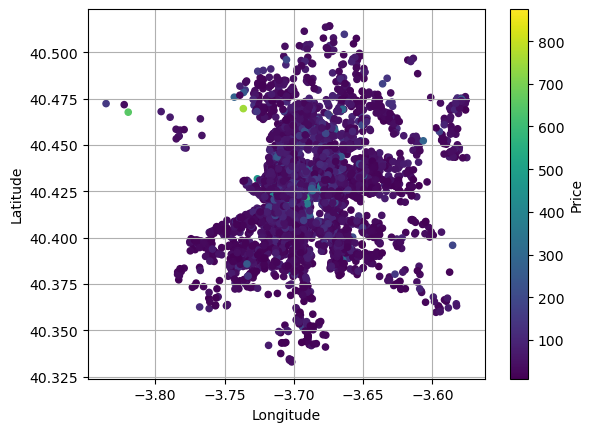

In [52]:
df.plot(kind='scatter', x='Longitude', y='Latitude', grid=True, c='Price')
plt.show()

Sí parece estar bien hecho el filtrado de Madrid. Quizá retomemos, según el tiempo que dispongamos, este gráfico para ver si vale la pena aplicar un clustering por barrios (a primera vista parece que no tiene particular sentido). De momento, simplemente nos centraremos en la parte del ejercicio que tocaba ahora.

Viendo el resultado del ejercicio "head" anterior al filtrado por Madrid, ya se aprecia que hay un volumen importante de datos que habrá que limpiar, o bien porque no son numéricos y no podremos aplicar análisis de regresión, o bien porque vienen mayoritariamente vacios.

Vamos a ver con un describe cuáles son las características estadísticas de la muestra:

In [53]:
df.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.056700e+04,1.056700e+04,1.056700e+04,9254.000000,10564.000000,10564.000000,10567.000000,10567.000000,10567.000000,10527.000000,...,10567.000000,8281.000000,8265.000000,8270.000000,8259.000000,8269.000000,8256.000000,8257.000000,10567.000000,8388.000000
mean,1.036286e+07,2.017041e+13,3.705377e+07,94.816944,9.994226,9.994226,40.420436,-3.697122,3.188228,1.256863,...,23.163055,91.584833,9.404961,9.320556,9.626105,9.647599,9.546512,9.207824,7.766727,1.927200
std,5.514016e+06,4.340049e+00,3.417928e+07,15.283509,27.967653,27.967653,0.019802,0.023267,1.989624,0.608184,...,38.364933,9.111923,0.937778,1.007962,0.790429,0.753407,0.759526,0.965451,19.905940,1.891259
min,1.986400e+04,2.017041e+13,1.745300e+04,0.000000,0.000000,0.000000,40.332908,-3.835498,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.777426e+06,2.017041e+13,7.703309e+06,100.000000,1.000000,1.000000,40.410092,-3.707766,2.000000,1.000000,...,1.000000,88.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.480000
50%,1.143921e+07,2.017041e+13,2.705286e+07,100.000000,2.000000,2.000000,40.418471,-3.701573,2.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.270000
75%,1.532665e+07,2.017041e+13,5.619576e+07,100.000000,5.000000,5.000000,40.427683,-3.693876,4.000000,1.000000,...,28.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.880000
max,1.810984e+07,2.017041e+13,1.247534e+08,100.000000,265.000000,265.000000,40.514247,-3.575142,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


De entrada se aprecia que un número importante de columnas va a requerir limpieza de datos

In [54]:
df.value_counts()

Series([], Name: count, dtype: int64)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10567 non-null  int64  
 1   Listing Url                     10567 non-null  object 
 2   Scrape ID                       10567 non-null  int64  
 3   Last Scraped                    10567 non-null  object 
 4   Name                            10567 non-null  object 
 5   Summary                         10178 non-null  object 
 6   Space                           7730 non-null   object 
 7   Description                     10561 non-null  object 
 8   Experiences Offered             10567 non-null  object 
 9   Neighborhood Overview           6616 non-null   object 
 10  Notes                           4036 non-null   object 
 11  Transit                         6571 non-null   object 
 12  Access                          6009 

Confirmamos que el número de columnas es elevado y que muchas de las variables no figuran con formato de número. Podríamos categorizar algunas de las anteriores, pero parece complicado categorizar tantas variables. Por lo tanto, en una primera aproximación, limpiamos todas las categorías no numéricas.

In [56]:
col_num=df.select_dtypes(include=['number']).columns
df_num=df[col_num]
df_num.head()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,5994463,20170407214119,31124866,100.0,2.0,2.0,40.407732,-3.684819,4,1.0,...,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,2.0,0.50
1,14136180,20170407214119,85301317,100.0,1.0,1.0,40.415802,-3.705340,4,1.0,...,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,1.0,2.43
2,15520134,20170407214119,84213235,100.0,16.0,16.0,40.389048,-3.740374,1,1.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
3,8809721,20170407214119,15258781,100.0,114.0,114.0,40.412814,-3.703052,2,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN
4,1162707,20170407214119,1706029,100.0,2.0,2.0,40.438631,-3.713716,2,1.0,...,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,2.0,2.08


Se me ha reducido a 36 columnas. Siguen siendo muchas. Intento eliminar aquellas que no tienen demasiado sentido por ser meramente identificativas (ID, Scrape ID, Host ID, ...) a tal fin, saco df_num para ver qué más puedo depurar.

In [57]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10567 non-null  int64  
 1   Scrape ID                       10567 non-null  int64  
 2   Host ID                         10567 non-null  int64  
 3   Host Response Rate              9254 non-null   float64
 4   Host Listings Count             10564 non-null  float64
 5   Host Total Listings Count       10564 non-null  float64
 6   Latitude                        10567 non-null  float64
 7   Longitude                       10567 non-null  float64
 8   Accommodates                    10567 non-null  int64  
 9   Bathrooms                       10527 non-null  float64
 10  Bedrooms                        10549 non-null  float64
 11  Beds                            10530 non-null  float64
 12  Square Feet                     413 n

Decepcionante. Tampoco hay tanto limpiable de forma muy clara. Al menos depuro las de ID:

In [58]:
df_num_2 = df_num.drop(['ID', 'Scrape ID', 'Host ID'], axis=1)
df_num_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              9254 non-null   float64
 1   Host Listings Count             10564 non-null  float64
 2   Host Total Listings Count       10564 non-null  float64
 3   Latitude                        10567 non-null  float64
 4   Longitude                       10567 non-null  float64
 5   Accommodates                    10567 non-null  int64  
 6   Bathrooms                       10527 non-null  float64
 7   Bedrooms                        10549 non-null  float64
 8   Beds                            10530 non-null  float64
 9   Square Feet                     413 non-null    float64
 10  Price                           10559 non-null  float64
 11  Weekly Price                    2697 non-null   float64
 12  Monthly Price                   2673 

Tiene mejor pinta. Aún así siguen siendo muchas variables. Analziando las variables quizá puedo depurar por grupos. Por ejemplo, Weekly Price, Monthly Price y Price seguro que tienen una correlación de casi 1. Lo estudio a través de la matriz de correlaciones.

In [59]:
corr_1 = df_num_2[['Price','Weekly Price', 'Monthly Price']].corr()
print(corr_1)

                  Price  Weekly Price  Monthly Price
Price          1.000000      0.875388       0.772626
Weekly Price   0.875388      1.000000       0.923717
Monthly Price  0.772626      0.923717       1.000000


Este resultado no me lo esperaba. Se supone que estos datos estarían ofreciendo datos redundantes. Esperaría correlación más elevada. En cualquier caso, no me parece buena práctica regresar el precio al precio'semanal' o 'mensual', ya que no me creo que si a futuro tengo que predecir a futuro el precio de Airbnb disponga de los datos anteriores. Así que hago una elección como científico de datos: descarto las columnas anteriores. 

In [60]:
df_num_3=df_num_2.drop(['Weekly Price', 'Monthly Price'], axis=1)

Intento hacer algo similar a lo que he hecho con el precio con las variables de availability, por si están muy correlacionadas

In [61]:
corr_2 = df_num_3[['Availability 30','Availability 60','Availability 90','Availability 365']].corr()
print(corr_2)

                  Availability 30  Availability 60  Availability 90  \
Availability 30          1.000000         0.921841         0.851681   
Availability 60          0.921841         1.000000         0.963705   
Availability 90          0.851681         0.963705         1.000000   
Availability 365         0.423893         0.486980         0.530879   

                  Availability 365  
Availability 30           0.423893  
Availability 60           0.486980  
Availability 90           0.530879  
Availability 365          1.000000  


Estas variables también parecen bastante correlacionadas, al menos la disponibilidad 30, 60 y 90. Por lo tanto, opto por eliminarlos.

In [62]:
df_num_4=df_num_3.drop(['Availability 60', 'Availability 90'], axis=1)

Por si me dejo algunas variables fuertemente correlacionadas, para limpiar el dataframe de algún problema de multicolinealidad que se me haya podido escapar. Reciclo el códugo que se utilizó en clase para construir un mapa de calor de correlación.

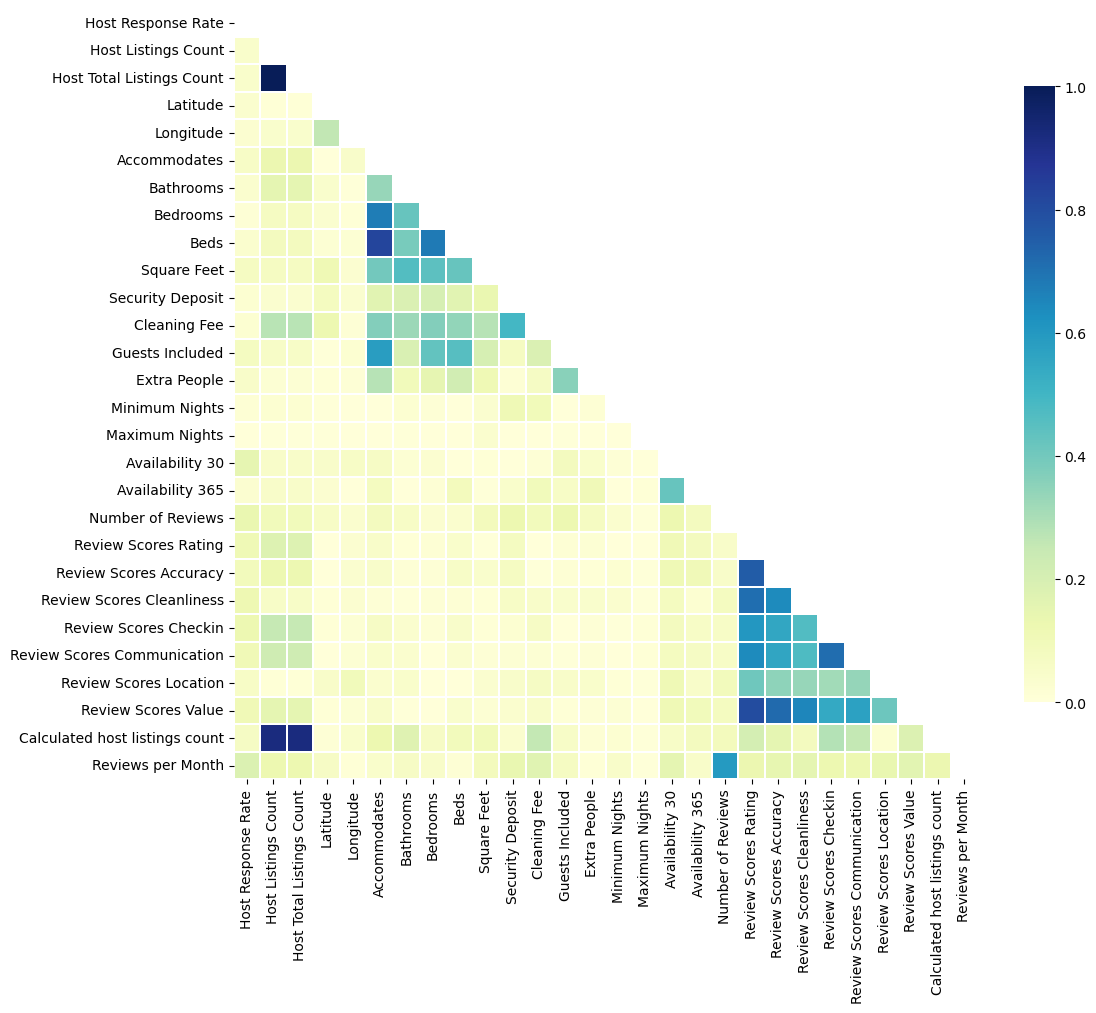

In [63]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_num_4.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

El anterior esquema me dice lo siguiente:
a) Sigue habiendo variables que aportan muy poca información adicional y mucho contenido redundante. En particular todas aquellas relativas al Host Listings Count, Host Total Listings Count y Calculated Host listings Count. Seleccion una y descarto la otra.
b) Hay conjuntos de variables correlacionadas entre sí. En particular toda la parte de los review scores. Probablemnte tendría sentido hacer una medida sintética para incorporar toda la información. De momento no quito ninguna, pero sospecho que hay una fuerte multicolinealidad y que quizá me baste con emplear Review Scores Rating.

De los anteriores ajustes, sólo voy a proceder con el primero.

In [64]:
df_num_5=df_num_4.drop(['Host Total Listings Count', 'Calculated host listings count'], axis=1)

Ya debería ir pensando en preprarar los datos para el análisis. Voy a hacer a continuación dos ejercicios de análisis de interés:
1. Ver si tiene sentido agregar por zonas geográficas, quizá creando mapas de calor por zonas concretas, para ver si tiene sentido aplicar algún tipo de clustering.
2. Una ordenación de las variables más fuertemente correlacionadas con la variable dependiente (antes de depurar datos vacíos).

Por prudencia, aquí dejo de limpiar columnas, por evitar pasarme a un ejercicio de "reducción de dimensionalidad", que no es estrictamente lo que pretendo todavía.

En cambio, creemos que ya estamos en la fase de "Eliminación de outliers", así que intentamos extraer "scatter plots" para ver qué datos escapan de lo que sería una distribución razonable. Primero fijaremos el precio como la primera columna contra la que compararán todos los scatter plots. (Nota: Esta solución la he buscado de Chatgpt porque me liaba para construir los scatter plots con una columna intermedia)

In [65]:
df_num_prueba=df_num_5.set_index('Price')

In [66]:
df_num_prueba.head()

,Host Response Rate,Host Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Security Deposit,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
Price,,,,,,,,,,,,,,,,,,,,,
60.0,100.0,2.0,40.407732,-3.684819,4,1.0,1.0,2.0,NaN,NaN,...,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,0.50
50.0,100.0,1.0,40.415802,-3.705340,4,1.0,1.0,2.0,NaN,NaN,...,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,2.43
10.0,100.0,16.0,40.389048,-3.740374,1,1.5,1.0,8.0,NaN,NaN,...,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.0,100.0,114.0,40.412814,-3.703052,2,3.0,1.0,1.0,NaN,NaN,...,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32.0,100.0,2.0,40.438631,-3.713716,2,1.0,1.0,1.0,NaN,NaN,...,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,2.08


Una vez hecho lo anterior, tratamos de generar los scatterplots, al menos de las variables que nos parecen más relevantes. Dado que son 26 columnas, intentaremos hacerlo de 5 en 5 para que sea manejable 

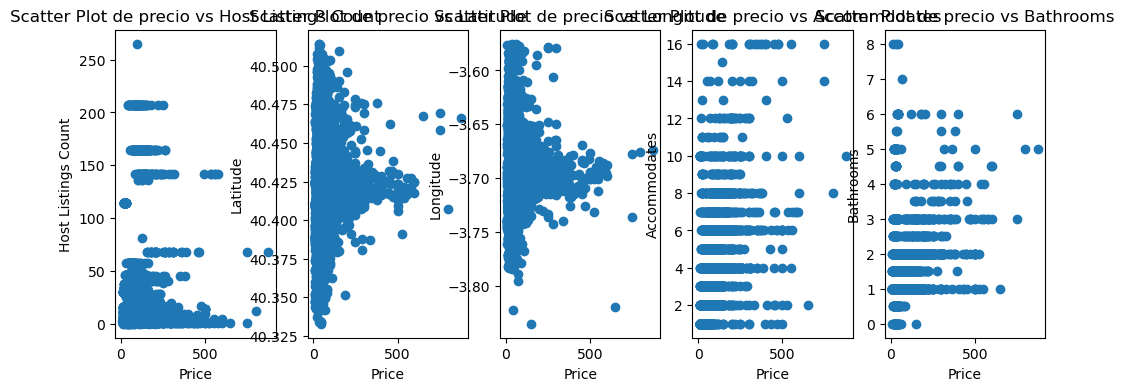

In [73]:
#PRIMER GRUPO DE VARIABLES

# Calcular el número de filas y columnas para los subgráficos
num_columnas1 = 5
num_filas = 1

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(num_filas, num_columnas1, figsize=(12, 4))


# Convertir las columnas a listas para facilitar el acceso
columnas = df_num_prueba.columns.tolist()

# Crear scatter plots con cada una de las otras columnas
for i in range(num_columnas1):
    axes[i].scatter(df['Price'], df[columnas[i + 1]])
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel(columnas[i + 1])
    axes[i].set_title(f'Scatter Plot de precio vs {columnas[i + 1]}')

# Ajustar el diseño y mostrar los subgráficos
plt.show()

Conclusiones del primer paquete:
1. Host list count no parece útil para predecir. A considerar: descartarla de la muestra.
2. Longitud y latitud deberán cuonvertires en cluster
3. Accomodates y Bathrom parecen útiles y no parece que tengan problemas de outliers

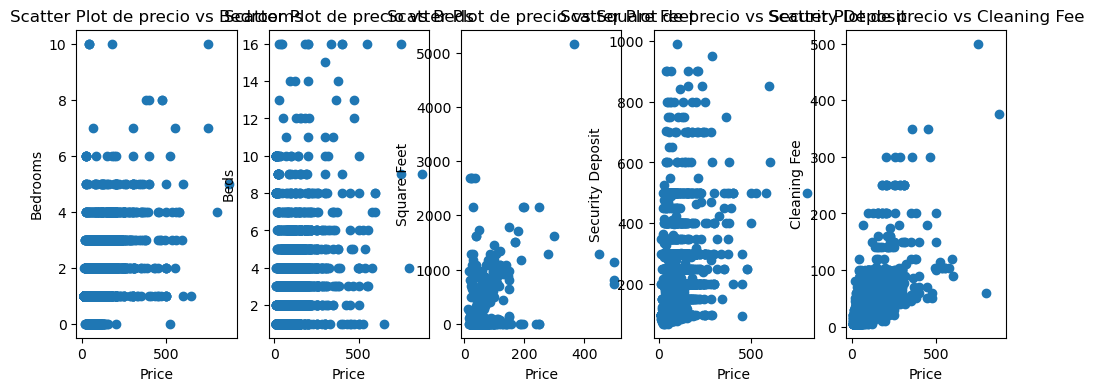

In [76]:
#SEGUNDO GRUPO DE VARIABLES

# Calcular el número de filas y columnas para los subgráficos
num_columnas1 = 5
num_filas = 1

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(num_filas, num_columnas1, figsize=(12, 4))


# Convertir las columnas a listas para facilitar el acceso
columnas = df_num_prueba.columns.tolist()

# Crear scatter plots con cada una de las otras columnas
for i in range(5,10):
    axes[i-5].scatter(df['Price'], df[columnas[i + 1]])
    axes[i-5].set_xlabel('Price')
    axes[i-5].set_ylabel(columnas[i + 1])
    axes[i-5].set_title(f'Scatter Plot de precio vs {columnas[i + 1]}')

# Ajustar el diseño y mostrar los subgráficos
plt.show()

De este segundo grupo de variables observamos:
    1. Bedrooms parece influir
    2. Beds algo menos
    3. Parece que hay outliers en SqareFeet
    4- Security deposit parece relativamente limpio
    5. Cleaning fee parece que tiene también algún outlier

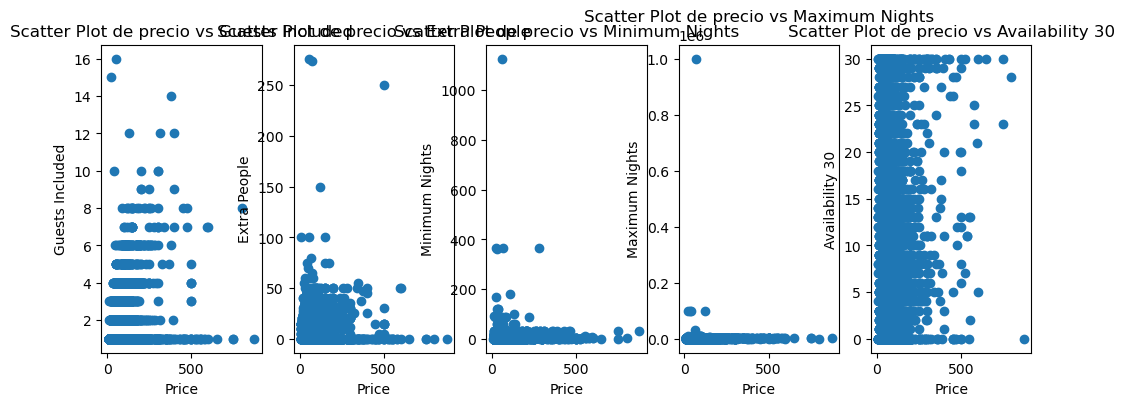

In [78]:
#TERCER GRUPO DE VARIABLES

# Calcular el número de filas y columnas para los subgráficos
num_columnas1 = 5
num_filas = 1

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(num_filas, num_columnas1, figsize=(12, 4))


# Convertir las columnas a listas para facilitar el acceso
columnas = df_num_prueba.columns.tolist()

# Crear scatter plots con cada una de las otras columnas
for i in range(10,15):
    axes[i-10].scatter(df['Price'], df[columnas[i + 1]])
    axes[i-10].set_xlabel('Price')
    axes[i-10].set_ylabel(columnas[i + 1])
    axes[i-10].set_title(f'Scatter Plot de precio vs {columnas[i + 1]}')

# Ajustar el diseño y mostrar los subgráficos
plt.show()

En este paquete se observa:
    1. Hay outliers en "Extra people" (Se propone excluir a partir de 95)
    2. Minimum nights y maximum nights no parecen tener sentido en su escala y, además, tampoco parece que tengan gran poder explicativo. Probablemente merite o bien un análisis en profundidad o bien descartarlas.
    

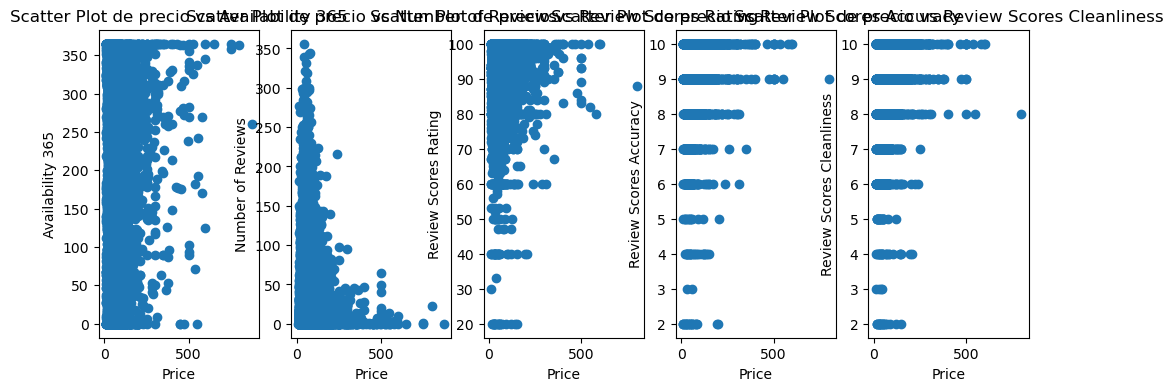

In [80]:
#CUARTO GRUPO DE VARIABLES

# Calcular el número de filas y columnas para los subgráficos
num_columnas1 = 5
num_filas = 1

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(num_filas, num_columnas1, figsize=(12, 4))


# Convertir las columnas a listas para facilitar el acceso
columnas = df_num_prueba.columns.tolist()

# Crear scatter plots con cada una de las otras columnas
for i in range(15,20):
    axes[i-15].scatter(df['Price'], df[columnas[i + 1]])
    axes[i-15].set_xlabel('Price')
    axes[i-15].set_ylabel(columnas[i + 1])
    axes[i-15].set_title(f'Scatter Plot de precio vs {columnas[i + 1]}')

# Ajustar el diseño y mostrar los subgráficos
plt.show()

De este grupo de variables se observa:
1. Availability no parece tener una gran influencia y probablemente se puede descartar
2. Number of ratings tampoco parece que tenga gran inflencia en el precio
3. Las otras variables (score accuracy, cleaniiness y rating) parece que tienen influencia.

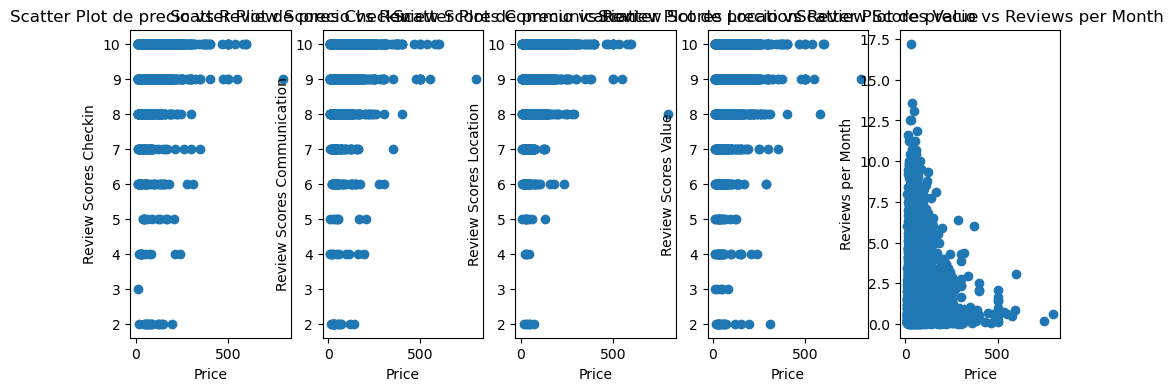

In [82]:
#QUINTO Y ULTIMO GRUPO DE VARIABLES

# Calcular el número de filas y columnas para los subgráficos
num_columnas1 = 5
num_filas = 1

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(num_filas, num_columnas1, figsize=(12, 4))


# Convertir las columnas a listas para facilitar el acceso
columnas = df_num_prueba.columns.tolist()

# Crear scatter plots con cada una de las otras columnas
for i in range(20,25):
    axes[i-20].scatter(df['Price'], df[columnas[i + 1]])
    axes[i-20].set_xlabel('Price')
    axes[i-20].set_ylabel(columnas[i + 1])
    axes[i-20].set_title(f'Scatter Plot de precio vs {columnas[i + 1]}')

# Ajustar el diseño y mostrar los subgráficos
plt.show()

En este gráfico no tienen outliers savlo en reviews per month, donde figura un outlier en 17,5.

Finalmente, para analizar precios se opta por extraer el histograma de precios. Como lo permite el espacio, aprovechamos también para sacar histograma de aquellas variables donde sospechamos outliers (square feet, clealing fee, extra people, reviews per month)

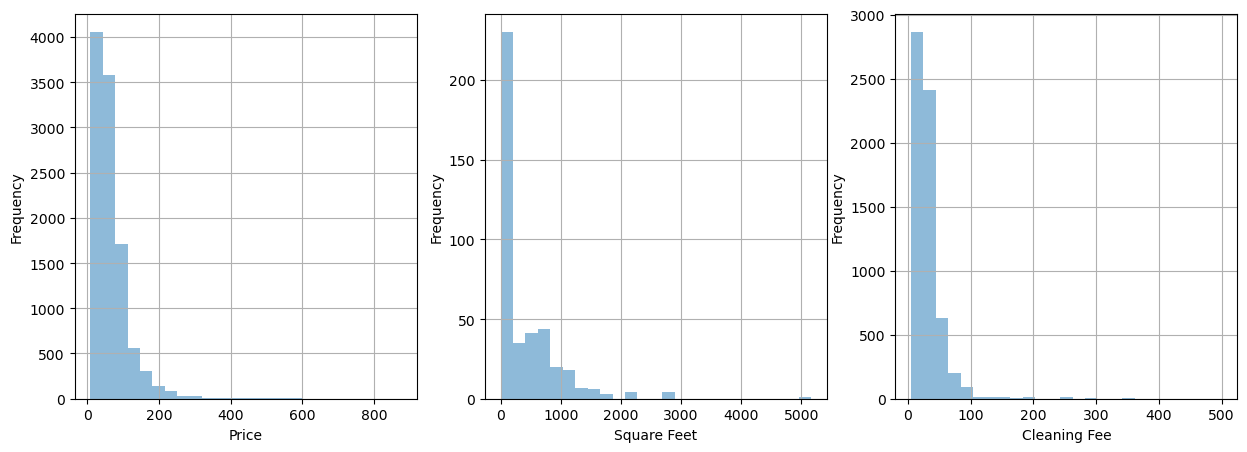

In [97]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df_num_5['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.subplot(1,3,2)
df_num_5['Square Feet'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Square Feet')

plt.subplot(1,3,3)
df_num_5['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Cleaning Fee')

plt.show()

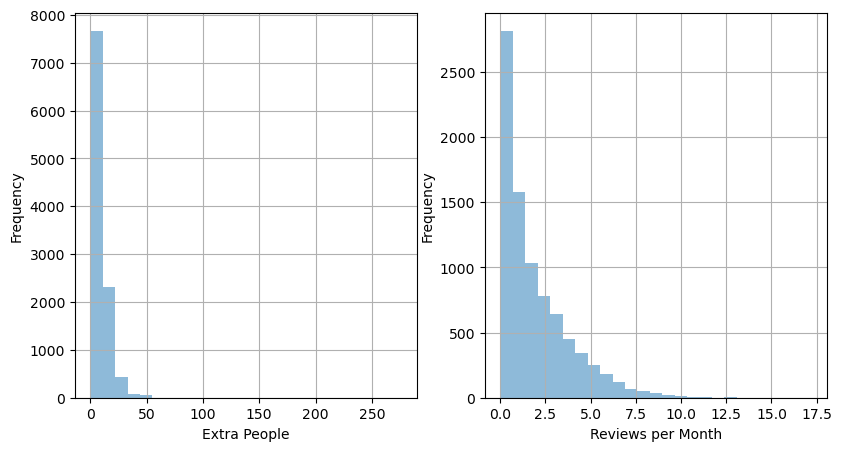

In [87]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df_num_5['Extra People'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Extra People')

plt.subplot(1,3,2)
df_num_5['Reviews per Month'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Reviews per Month')


plt.show()

Del anterior análisis se sacan una serie de conclusiones:
    1. Puede tener sentido acotar precios por encima de 600 y aplicar algún tipo de transformaación en la distribución
    2. Idem respecto a los square feet (nota, podríamos transformar en metros, pero al ser un tema de escala, no nos preocupa), Proponemos descartar por encima de 3000.
    3. Idem respecto a la cleaning fee. Proponemos descartar por encima de 200.
    4. Idem respecto al Extra people. Proponemos descartar por encima de 75
    5. Idem respecto Reviews per month. Poponemos descartar por encima de 17,5
    
  Con el fin de realizar las anteriores transformaciones, antes saco un info para ver el nombre de las dimensiones.

In [88]:
df_num_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Rate           9254 non-null   float64
 1   Host Listings Count          10564 non-null  float64
 2   Latitude                     10567 non-null  float64
 3   Longitude                    10567 non-null  float64
 4   Accommodates                 10567 non-null  int64  
 5   Bathrooms                    10527 non-null  float64
 6   Bedrooms                     10549 non-null  float64
 7   Beds                         10530 non-null  float64
 8   Square Feet                  413 non-null    float64
 9   Price                        10559 non-null  float64
 10  Security Deposit             4549 non-null   float64
 11  Cleaning Fee                 6282 non-null   float64
 12  Guests Included              10567 non-null  int64  
 13  Extra People         

Aquí es donde me doy cuenta que prácticamente no tengo datos para Sqare Feet, con lo cual, para que no me distorsione el análisis, en lugar de eliminar outliers, opto directamente por eliminarlo.

In [92]:
df_num_6=df_num_5.drop(['Host Response Rate', 'Host Listings Count','Minimum Nights','Maximum Nights', 'Square Feet'], axis=1)
 

In [116]:
df_num_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     10567 non-null  float64
 1   Longitude                    10567 non-null  float64
 2   Accommodates                 10567 non-null  int64  
 3   Bathrooms                    10527 non-null  float64
 4   Bedrooms                     10549 non-null  float64
 5   Beds                         10530 non-null  float64
 6   Price                        10559 non-null  float64
 7   Security Deposit             4549 non-null   float64
 8   Cleaning Fee                 6282 non-null   float64
 9   Guests Included              10567 non-null  int64  
 10  Extra People                 10567 non-null  int64  
 11  Availability 30              10567 non-null  int64  
 12  Availability 365             10567 non-null  int64  
 13  Number of Reviews    

No obstante, antes de aplicar el filtrado de outliers, dado que algunos se refieren a campos con NA, debo proceder a aplicar una estrategia de aproximación a los nulos.

El enfoque propuesto es:

cambiarlos por "0" donde tiene sentido (cleaning fee y security deposit)
cambiarlos medianas en el caso de los scorings (podríamos eliminarlos, pero creo que perderíamos demasiada información de la muestra).

In [144]:
df_num_6['Cleaning Fee'].fillna(0,inplace=True)
df_num_6['Security Deposit'].fillna(0,inplace=True)
medianRSR=df_num_6['Review Scores Rating'].median()
medianRSA=df_num_6['Review Scores Accuracy'].median()
medianRSC=df_num_6['Review Scores Cleanliness'].median()
medianRSCh=df_num_6['Review Scores Checkin'].median()
medianRSCom=df_num_6['Review Scores Communication'].median()
medianRSL=df_num_6['Review Scores Location'].median()
medianRSV=df_num_6['Review Scores Value'].median()
medianRpM=df_num_6['Reviews per Month'].median()
df_num_6['Review Scores Rating'].fillna(medianRSR,inplace=True)
df_num_6['Review Scores Accuracy'].fillna(medianRSA,inplace=True)
df_num_6['Review Scores Cleanliness'].fillna(medianRSC,inplace=True)
df_num_6['Review Scores Checkin'].fillna(medianRSCh,inplace=True)
df_num_6['Review Scores Communication'].fillna(medianRSCom,inplace=True)
df_num_6['Review Scores Location'].fillna(medianRSL,inplace=True)
df_num_6['Review Scores Value'].fillna(medianRSL,inplace=True)
df_num_6['Reviews per Month'].fillna(medianRpM,inplace=True)

df_num_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     10567 non-null  float64
 1   Longitude                    10567 non-null  float64
 2   Accommodates                 10567 non-null  int64  
 3   Bathrooms                    10527 non-null  float64
 4   Bedrooms                     10549 non-null  float64
 5   Beds                         10530 non-null  float64
 6   Price                        10559 non-null  float64
 7   Security Deposit             10567 non-null  float64
 8   Cleaning Fee                 10567 non-null  float64
 9   Guests Included              10567 non-null  int64  
 10  Extra People                 10567 non-null  int64  
 11  Availability 30              10567 non-null  int64  
 12  Availability 365             10567 non-null  int64  
 13  Number of Reviews    

También necesito eliminar los n/a restantes (son pocos)

In [162]:
df_num_7=df_num_6.dropna()
df_num_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10493 entries, 0 to 11823
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     10493 non-null  float64
 1   Longitude                    10493 non-null  float64
 2   Accommodates                 10493 non-null  int64  
 3   Bathrooms                    10493 non-null  float64
 4   Bedrooms                     10493 non-null  float64
 5   Beds                         10493 non-null  float64
 6   Price                        10493 non-null  float64
 7   Security Deposit             10493 non-null  float64
 8   Cleaning Fee                 10493 non-null  float64
 9   Guests Included              10493 non-null  int64  
 10  Extra People                 10493 non-null  int64  
 11  Availability 30              10493 non-null  int64  
 12  Availability 365             10493 non-null  int64  
 13  Number of Reviews    

Ahora sí, con los datos convertidos completamente en numéricos, puedo aplicar filtros para descartar outliers. Con todo, debo ir con cuidado porque los datos de los Reviews están muy distorsionados por la utilizaciones de medianas cuando no tengo mejor info. Ante la duda, en ejercicios futuros estas deberían caerse y, si alguna es significativa y lo justifica, considerar sacrificar datos a cambio de una mejor capacidad predictiva del modelo por construir.

In [163]:
df_num_8 = df_num_7[
    (df_num_7['Price'] <= 600) &
    (df_num_7['Cleaning Fee'] <= 200) &
    (df_num_7['Extra People'] <= 100) &
    (df_num_7['Reviews per Month'] <= 17.5)
]
df_num_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 11823
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     10462 non-null  float64
 1   Longitude                    10462 non-null  float64
 2   Accommodates                 10462 non-null  int64  
 3   Bathrooms                    10462 non-null  float64
 4   Bedrooms                     10462 non-null  float64
 5   Beds                         10462 non-null  float64
 6   Price                        10462 non-null  float64
 7   Security Deposit             10462 non-null  float64
 8   Cleaning Fee                 10462 non-null  float64
 9   Guests Included              10462 non-null  int64  
 10  Extra People                 10462 non-null  int64  
 11  Availability 30              10462 non-null  int64  
 12  Availability 365             10462 non-null  int64  
 13  Number of Reviews    

Ahora sí, con la finalidad de tener los datos completamente limpios, busco alguna fórmula de sustitución de latitud y longitud por un cluster, ya que, si no, estos datos carecerán de significación. Del manual recomendado (Geron) intento lo siguiente.

In [146]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def_init_(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
        
    def_fit(self, X, y=None, sample_weight=None):
        self.kmeans_=KMeans(self,n_clusters,random_state=self.random_state)
        self.kmeans_fit(X, sample_weight=sample_wight)
        return self
    def transform(self,X)
    def get_feature_names_out (self, names=None):
        return [f" Cluster {i} similarity" for i in range(self.n_clusters)]
    
cluster_simil = clusterSimilarity(n_cluisters=10, gamma=1., random_state=42)
similarities=cluster_simil.fit_transform(df_num_7[['Latitude','Longitude']], sample_weight=housing_labels)
    

SyntaxError: invalid syntax (207902791.py, line 3)

No me ha salido. Intento pues construir un modelo básico sin localización clusterizada y dejo para adelante mejorarlo.

Ahora voy a intentar ver qué es lo que tengo más correlacionado de las variables numéricas que me quedan

In [186]:
corr_matrix=df_num_8.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                          1.000000
Accommodates                   0.590313
Bedrooms                       0.511695
Cleaning Fee                   0.491306
Beds                           0.477085
Guests Included                0.392787
Bathrooms                      0.329805
Security Deposit               0.318121
Extra People                   0.130843
Review Scores Location         0.124387
Review Scores Cleanliness      0.078563
Availability 365               0.071004
Review Scores Accuracy         0.061771
Latitude                       0.061070
Review Scores Rating           0.056265
Review Scores Value            0.034876
Availability 30                0.013395
Review Scores Communication    0.011484
Review Scores Checkin          0.000325
Number of Reviews             -0.026253
Longitude                     -0.033739
Reviews per Month             -0.057565
Name: Price, dtype: float64

A partir de los datos anteriores ya veo que la mitad de las variables tienen muy poca influencia. Dejo para más adelante el tema del clustering, y el impacto de los scores y la utilización de la mediana. Probablemente sólo la mitad de las características me sirvan. No obstante, aplico un método más cientifico a continuación

# PREPROCESAMIENTO 

Optamos por un lasso con Cross Validation tal y como vimos en clase

In [171]:
df_num_8.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
0,40.407732,-3.684819,4,1.0,1.0,2.0,60.0,0.0,25.0,1,...,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,0.50
1,40.415802,-3.705340,4,1.0,1.0,2.0,50.0,0.0,15.0,1,...,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,2.43
2,40.389048,-3.740374,1,1.5,1.0,8.0,10.0,0.0,5.0,1,...,140,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.27
3,40.412814,-3.703052,2,3.0,1.0,1.0,30.0,0.0,0.0,1,...,311,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.27
4,40.438631,-3.713716,2,1.0,1.0,1.0,32.0,0.0,0.0,1,...,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,2.08


Desgraciadamente lo anterior no me sirve para Tenemos mover el precio a la primera columna para empezar a aplicar modelos

In [187]:
# Seleccionar la columna que deseas colocar como la primera columna
columna_a_mover = df_num_8['Price']

# Eliminar la columna seleccionada del DataFrame
df_num_8.drop(labels=['Price'], axis=1, inplace=True)

# Insertar la columna en la primera posición
df_num_8.insert(0, 'Price', columna_a_mover)

df_num_8.head()

C:\Users\ignacio.vicente\AppData\Local\Temp\ipykernel_55332\3428954695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_8.drop(labels=['Price'], axis=1, inplace=True)


,Price,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
0,60.0,40.407732,-3.684819,4,1.0,1.0,2.0,0.0,25.0,1,...,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,0.50
1,50.0,40.415802,-3.705340,4,1.0,1.0,2.0,0.0,15.0,1,...,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,2.43
2,10.0,40.389048,-3.740374,1,1.5,1.0,8.0,0.0,5.0,1,...,140,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.27
3,30.0,40.412814,-3.703052,2,3.0,1.0,1.0,0.0,0.0,1,...,311,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.27
4,32.0,40.438631,-3.713716,2,1.0,1.0,1.0,0.0,0.0,1,...,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,2.08


In [188]:
df_num_8.head()
df_num_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 11823
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        10462 non-null  float64
 1   Latitude                     10462 non-null  float64
 2   Longitude                    10462 non-null  float64
 3   Accommodates                 10462 non-null  int64  
 4   Bathrooms                    10462 non-null  float64
 5   Bedrooms                     10462 non-null  float64
 6   Beds                         10462 non-null  float64
 7   Security Deposit             10462 non-null  float64
 8   Cleaning Fee                 10462 non-null  float64
 9   Guests Included              10462 non-null  int64  
 10  Extra People                 10462 non-null  int64  
 11  Availability 30              10462 non-null  int64  
 12  Availability 365             10462 non-null  int64  
 13  Number of Reviews    

In [189]:
#preparamos los datos para modelizar

data = df_num_8.values

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df_num_8.columns[1:]

Somos conscientes que las distribuciones tratadas tienen sus limitaciones y que una aproximación a la regresión sin transformar previamente puede dar lugar a errores. No obstante, como primera aproximación, optamos por no transformar los datos más de lo que lo hemos hecho hasta ahora.

Vamos a normalizar los valores para que el ejercicio de selección pueda funcionar adecuadamente. y vamos a aplicar otra división train test sobre el propio conjunto test sobre el que estamos haciendo todas las pruebas.

In [190]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)



Datos entrenamiento:  (7846, 21)
Datos test:  (2616, 21)


In [176]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
best mean cross-validation score: -1536.378
best parameters: {'alpha': 0.1}


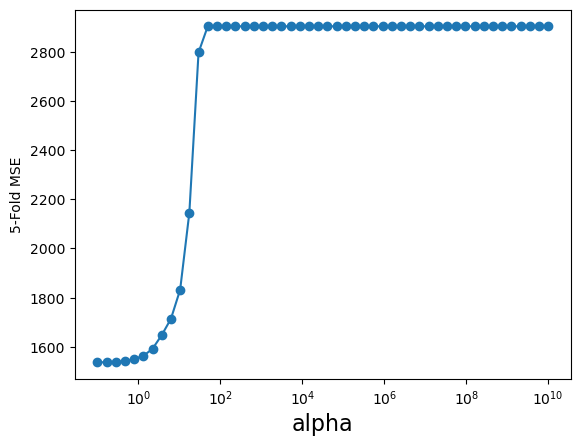

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

Se observa que el error se dispara exponencialmente llegado cierto nivel. El valor alfa que ofrece un mejor comportamiento train y test es 0,1

In [210]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)


print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Lasso (train): 1.52e+03
MSE Modelo Lasso (test) : 1.19e+03
RMSE Modelo Lasso (train): 39
RMSE Modelo Lasso (test) : 34.5
Latitude 0.0
Longitude 23.265084577319072
Accommodates 4.94994852782059
Bathrooms 7.9933109651206085
Bedrooms -5.200663920232586
Beds 1.8520175536574204
Security Deposit 13.197076503547493
Cleaning Fee 2.99082130543409
Guests Included -5.819815683028478
Extra People 4.154171162332907
Availability 30 0.0
Availability 365 -0.0
Number of Reviews 0.4186989257493446
Review Scores Rating 2.165526334238668
Review Scores Accuracy 2.4011302757793267
Review Scores Cleanliness 0.04689177051630561
Review Scores Checkin -1.1741783277823297
Review Scores Communication 4.6017153592921165
Review Scores Location -0.637808599747649
Review Scores Value -3.6516731432310268


In [ ]:
Por si acaso, se practican también regresiones Lasso con alphas diferentes para ver cómo se comportan los parámetros.

In [195]:
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha = 10^2).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Lasso (train): 1.75e+03
MSE Modelo Lasso (test) : 1.39e+03
RMSE Modelo Lasso (train): 41.8
RMSE Modelo Lasso (test) : 37.3
Latitude -0.0
Longitude 15.147947575522453
Accommodates 0.0
Bathrooms 6.26695559848801
Bedrooms 0.0
Beds 0.0
Security Deposit 9.755050384950573
Cleaning Fee 0.0
Guests Included -0.0
Extra People 0.0
Availability 30 0.0
Availability 365 -0.0
Number of Reviews 0.0
Review Scores Rating 0.0
Review Scores Accuracy 0.0
Review Scores Cleanliness 0.0
Review Scores Checkin 0.0
Review Scores Communication 0.0
Review Scores Location 0.0
Review Scores Value -0.0


In [196]:
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha = 10).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.81e+03
MSE Modelo Lasso (test) : 1.44e+03
RMSE Modelo Lasso (train): 42.5
RMSE Modelo Lasso (test) : 38
Latitude -0.0
Longitude 14.389825366341036
Accommodates 0.0
Bathrooms 5.235782186469249
Bedrooms 0.0
Beds 0.0
Security Deposit 8.407942369080244
Cleaning Fee 0.0
Guests Included -0.0
Extra People 0.0
Availability 30 0.0
Availability 365 -0.0
Number of Reviews 0.0
Review Scores Rating 0.0
Review Scores Accuracy 0.0
Review Scores Cleanliness 0.0
Review Scores Checkin 0.0
Review Scores Communication 0.0
Review Scores Location 0.0
Review Scores Value -0.0


En resumen, hemos realizado tres regresiones Lasso (con cross validation). Uno con valor optimo de alpha (0,1), otro con un valor de 10 y otro de 10^2. Ello nos permite ver las características más influyentes. De estas, el número de baños, la finaza y la longitud son las variables más robustas. Lo anterior nos sorprende, ya que esperábamos que el poder predictivo de la Logitude sería bajo. Nos quedamos con la propuesta de la optimizacióin por GridSearch. Esto implica utilizar una regresión con las siguientes características:
Longitude 23.265084577319072
Accommodates 4.94994852782059
Bathrooms 7.9933109651206085
Bedrooms -5.200663920232586
Beds 1.8520175536574204
Security Deposit 13.197076503547493
Cleaning Fee 2.99082130543409
Guests Included -5.819815683028478
Extra People 4.154171162332907
Number of Reviews 0.4186989257493446
Review Scores Rating 2.165526334238668
Review Scores Accuracy 2.4011302757793267
Review Scores Cleanliness 0.04689177051630561
Review Scores Checkin -1.1741783277823297
Review Scores Communication 4.6017153592921165
Review Scores Location -0.637808599747649
Review Scores Value -3.6516731432310268

# MODELADO

Nos quedamos con esta propuesta, pero le aplicamos cierto filtro lógico. A pesar de las variables seleccionadas, tomamos la decisión, autónoma del científico de datos y no soportada por el modelo de quitar al longitud como variable predictiva, ya que no nos encaja con el modelo subyacente. También quitamos las variables que no nos encajan desde el punto de vista del sentido lógico: Todos los review scores que parece tener un impacto negativo en el precio. Nos llama la atención el impacto fuertemente negativo de Bedrooms sobre el precio. Sospechamos que por compensar el impacto de Beds y Bathroom. Decidimos también descartarlo para favorecer un modelo más sencillo. Y corremos la regresión sobre la totalidad de los datos.

In [209]:
df_num_8.head()

,Price,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
0,60.0,40.407732,-3.684819,4,1.0,1.0,2.0,0.0,25.0,1,...,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,0.50
1,50.0,40.415802,-3.705340,4,1.0,1.0,2.0,0.0,15.0,1,...,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,2.43
2,10.0,40.389048,-3.740374,1,1.5,1.0,8.0,0.0,5.0,1,...,140,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.27
3,30.0,40.412814,-3.703052,2,3.0,1.0,1.0,0.0,0.0,1,...,311,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.27
4,32.0,40.438631,-3.713716,2,1.0,1.0,1.0,0.0,0.0,1,...,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,2.08


In [214]:
df_num_9=df_num_8.drop(['Review Scores Checkin','Bedrooms', 'Review Scores Location','Review Scores Accuracy','Longitude','Latitude','Availability 30', 'Availability 365','Review Scores Cleanliness'], axis=1)

In [264]:
df_num_9.head()
df_num_9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 11823
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        10462 non-null  float64
 1   Accommodates                 10462 non-null  int64  
 2   Bathrooms                    10462 non-null  float64
 3   Beds                         10462 non-null  float64
 4   Security Deposit             10462 non-null  float64
 5   Cleaning Fee                 10462 non-null  float64
 6   Guests Included              10462 non-null  int64  
 7   Extra People                 10462 non-null  int64  
 8   Number of Reviews            10462 non-null  int64  
 9   Review Scores Rating         10462 non-null  float64
 10  Review Scores Communication  10462 non-null  float64
 11  Review Scores Value          10462 non-null  float64
 12  Reviews per Month            10462 non-null  float64
dtypes: float64(9), int64(

Sobre este modelo vamos a correr la regresión sobre la totalidad de los datos "TRAIN" sin particionar ni practicar cross validation.

In [268]:
data2 = df_num_9.values

y2 = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X2 = data2[:,1:]      # nos quedamos con el resto

feature_names = df_num_9.columns[1:]
print(X2.shape)

(10462, 12)


In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X2, y2)

# Realizar predicciones en el conjunto de prueba
y_pred2 = reg.predict(X2)


# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y2, y_pred2)
r2 = r2_score(y2, y_pred2)

# Imprimir el error cuadrático medio
print("Error cuadrático medio:", mse)
print("Coef determinacion:", r2)
print('RMSE: %0.3g' % np.sqrt(mse))

# Obtener los coeficientes y la intersección
coeficientes = reg.coef_
interseccion = reg.intercept_

# Imprimir los coeficientes y la intersección
print("Coeficientes:", coeficientes)
print("Intersección:", interseccion)

Error cuadrático medio: 1499.09728589235
Coef determinacion: 0.46382252541891267
RMSE: 38.7
Coeficientes: [[13.05671978 10.99861937 -1.96102087  0.02156603  0.62856821  2.87440478
  -0.61730191 -0.01939919  0.4079448  -0.87701881  2.31091702 -2.21921964]]
Intersección: [-44.9340986]


El modelo no es bueno. Tiene un R2 bajo y un error RMSE elevado. No obstante, no es peor que el modelo Lasso optimizado sugerido.

Pero vamos a ver qué tal se comporta sobre el "Test" original. Vamos a convocarlo para testearlo:

In [233]:
dftest = pd.read_csv('./test.csv', sep=';', decimal='.')

In [234]:
dftest.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14732416,https://www.airbnb.com/rooms/14732416,20170407214119,2017-04-08,Habitación privada en entorno tranquilo.,El edificio está junto a un maravilloso parque...,Me preocupo mucho de que el apartamento esté l...,El edificio está junto a un maravilloso parque...,none,"El barrio es multicultural, podrás encontrar q...",...,10.0,9.0,10.0,NaN,NaN,flexible,1.0,1.59,"40.3463197925,-3.69144006284","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,5302840,https://www.airbnb.com/rooms/5302840,20170407214119,2017-04-08,Habitación en calle Mayor,Es una habitación con entrada independiente. D...,La habitación está situada en un edificio de l...,Es una habitación con entrada independiente. D...,none,"La habitación está en la calle Mayor, en el ba...",...,10.0,10.0,10.0,NaN,NaN,moderate,3.0,1.20,"40.4144233958,-3.71284713904","Host Has Profile Pic,Host Identity Verified,Is..."
2,15241840,https://www.airbnb.com/rooms/15241840,20170407214119,2017-04-08,Lovely place for2 in the center of Madrid Cham...,Lovely place ideal for 2 (couple or 2 friends)...,"Lovely place in the heart of Madrid, in Chambe...",Lovely place ideal for 2 (couple or 2 friends)...,none,Quiet street in a animated district of Chamber...,...,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"40.4370117738,-3.6989874106","Host Has Profile Pic,Host Identity Verified,Re..."
3,10881538,https://www.airbnb.com/rooms/10881538,20170407214119,2017-04-08,Habitación cómoda bien comunicada!,Alquilo habitación al lado de casa de Campo (p...,"Habitación con cama de 90 cm, con una supletor...",Alquilo habitación al lado de casa de Campo (p...,none,Tranquilo,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,0.24,"40.4079324297,-3.74453330612","Host Has Profile Pic,Host Identity Verified,Re..."
4,7317218,https://www.airbnb.com/rooms/7317218,20170407214119,2017-04-08,buhardilla con encanto,"En pleno centro de madrid,coqueta buahardilla ...",NaN,"En pleno centro de madrid,coqueta buahardilla ...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,2.0,NaN,"40.4101071551,-3.70486859629","Host Has Profile Pic,Requires License"


El reto es repetir sobre el test todas las transformaciones del ejercicio manera que se pueda aplicar la regresión anterior sobre el mismo.

In [235]:
col_num=df.select_dtypes(include=['number']).columns
dftest2=dftest[col_num]
df_test2=df_test2[df_test2['City']=='Madrid']

In [236]:
dftest2['Cleaning Fee'].fillna(0,inplace=True)
dftest2['Security Deposit'].fillna(0,inplace=True)
medianRSR=dftest['Review Scores Rating'].median()
medianRSA=dftest['Review Scores Accuracy'].median()
medianRSC=dftest['Review Scores Cleanliness'].median()
medianRSCh=dftest['Review Scores Checkin'].median()
medianRSCom=dftest['Review Scores Communication'].median()
medianRSL=dftest['Review Scores Location'].median()
medianRSV=dftest['Review Scores Value'].median()
medianRpM=dftest['Reviews per Month'].median()
dftest2['Review Scores Rating'].fillna(medianRSR,inplace=True)
dftest2['Review Scores Accuracy'].fillna(medianRSA,inplace=True)
dftest2['Review Scores Cleanliness'].fillna(medianRSC,inplace=True)
dftest2['Review Scores Checkin'].fillna(medianRSCh,inplace=True)
dftest2['Review Scores Communication'].fillna(medianRSCom,inplace=True)
dftest2['Review Scores Location'].fillna(medianRSL,inplace=True)
dftest2['Review Scores Value'].fillna(medianRSL,inplace=True)
dftest2['Reviews per Month'].fillna(medianRpM,inplace=True)


C:\Users\ignacio.vicente\AppData\Local\Temp\ipykernel_55332\1782570399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest2['Cleaning Fee'].fillna(0,inplace=True)
C:\Users\ignacio.vicente\AppData\Local\Temp\ipykernel_55332\1782570399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest2['Security Deposit'].fillna(0,inplace=True)
C:\Users\ignacio.vicente\AppData\Local\Temp\ipykernel_55332\1782570399.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [241]:
df_test3=dftest2.drop(['ID', 'Scrape ID', 'Host ID','Weekly Price', 'Monthly Price','Host Total Listings Count','Calculated host listings count','Host Response Rate', 'Host Listings Count','Minimum Nights','Maximum Nights', 'Square Feet','Review Scores Checkin','Bedrooms', 'Review Scores Location','Review Scores Accuracy','Longitude','Latitude','Availability 30','Availability 60', 'Availability 90', 'Availability 365','Review Scores Cleanliness'], axis=1)

In [242]:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Accommodates                 2956 non-null   int64  
 1   Bathrooms                    2945 non-null   float64
 2   Beds                         2944 non-null   float64
 3   Price                        2954 non-null   float64
 4   Security Deposit             2956 non-null   float64
 5   Cleaning Fee                 2956 non-null   float64
 6   Guests Included              2956 non-null   int64  
 7   Extra People                 2956 non-null   int64  
 8   Number of Reviews            2956 non-null   int64  
 9   Review Scores Rating         2956 non-null   float64
 10  Review Scores Communication  2956 non-null   float64
 11  Review Scores Value          2956 non-null   float64
 12  Reviews per Month            2956 non-null   float64
dtypes: float64(9), int

In [260]:
columna_a_mover = df_test3['Price']

# Eliminar la columna seleccionada del DataFrame
df_test3.drop(labels=['Price'], axis=1, inplace=True)

# Insertar la columna en la primera posición
df_test3.insert(0, 'Price', columna_a_mover)

df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        2954 non-null   float64
 1   Accommodates                 2956 non-null   int64  
 2   Bathrooms                    2945 non-null   float64
 3   Beds                         2944 non-null   float64
 4   Security Deposit             2956 non-null   float64
 5   Cleaning Fee                 2956 non-null   float64
 6   Guests Included              2956 non-null   int64  
 7   Extra People                 2956 non-null   int64  
 8   Number of Reviews            2956 non-null   int64  
 9   Review Scores Rating         2956 non-null   float64
 10  Review Scores Communication  2956 non-null   float64
 11  Review Scores Value          2956 non-null   float64
 12  Reviews per Month            2956 non-null   float64
dtypes: float64(9), int

In [261]:
df_test4=df_test3.dropna()
df_test4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2936 entries, 0 to 2955
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        2936 non-null   float64
 1   Accommodates                 2936 non-null   int64  
 2   Bathrooms                    2936 non-null   float64
 3   Beds                         2936 non-null   float64
 4   Security Deposit             2936 non-null   float64
 5   Cleaning Fee                 2936 non-null   float64
 6   Guests Included              2936 non-null   int64  
 7   Extra People                 2936 non-null   int64  
 8   Number of Reviews            2936 non-null   int64  
 9   Review Scores Rating         2936 non-null   float64
 10  Review Scores Communication  2936 non-null   float64
 11  Review Scores Value          2936 non-null   float64
 12  Reviews per Month            2936 non-null   float64
dtypes: float64(9), int64(4)

In [262]:
data_test=df_test4.values

y3 = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X3 = data_test[:,1:]      # nos quedamos con el resto

feature_names = df_test3.columns[1:]


Y aplicamos el modelo sobre estos datos.

In [270]:
y_pred3 = reg.predict(X3)

# Calcular el error cuadrático medio (MSE)
mse_3 = mean_squared_error(y3, y_pred3)
r2_3 = r2_score(y3, y_pred3)

# Imprimir el error cuadrático medio
print("Error cuad medio:", mse_3)
print("Coef det:", r2_3)
print('RMSE: %0.3g' % np.sqrt(mse_3))

# Obtener los coeficientes y la intersección
coeficientes = reg.coef_
interseccion = reg.intercept_

# Imprimir los coeficientes y la intersección
print("Coeficientes:", coeficientes)
print("Intersección:", interseccion)

Error cuad medio: 3515.603928661971
Coef det: 0.3572297707508757
RMSE: 59.3
Coeficientes: [[13.05671978 10.99861937 -1.96102087  0.02156603  0.62856821  2.87440478
  -0.61730191 -0.01939919  0.4079448  -0.87701881  2.31091702 -2.21921964]]
Intersección: [-44.9340986]


# RESULTADO Y CONCLUSIONES

El resultado sobre Test ha resultado manifiestamente malo. Un coeficiente de determinación lineal del 35% y un error medio de 60 USD no es una predicción aceptable. El modelo lo descartamos. No me queda tiempo para seguir mejorando la entrega. De haberlo tenido habría probado diferentes modelos para ver si mejoro el resultado (SVMs, Kernel, SCA...) y habría intentado utilizar latitud y longitud para construir un cluster geográfico sobre Madrid.